# Задача 3. Сравнение методов классификации

* **Дедлайн**: 19.11.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [X] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- [X] Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Демо блокнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).
- [X] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [X] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [X] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- [X] Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).
- [X] Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

### Описание датасета

Датасет https://github.com/rustam-azimov/ml-course/blob/main/data/heart_disease/heart.csv

Основные признаки:
* age - возраст (количество лет)
* sex - пол (1 = мужчина; 0 = женщина)
* cp - тип боли в груди
* trestbps - давление в состоянии покоя (в мм рт. ст. при поступлении в стационар)
* chol - холестерин в мг/дл
* fbs - уровень сахара в крови натощак > 120 мг/дл (1 = верно; 0 = неверно)
* restecg - результаты электрокардиографии в покое
* thalach - максимальная частота сердечных сокращений
* exang - стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
* oldpeak - депрессия ST, вызванная физическими упражнениями, по сравнению с отдыхом
* slope - наклон пикового сегмента ST при нагрузке
* ca - количество магистральных сосудов (0-3), окрашенных флюороскопией
* thal - 3 = нормальный; 6 = исправленный дефект; 7 = обратимый дефект
* target - есть заболевание или нет (1=да, 0=нет)

Будем пытаться предсказать целевой признак **target** по остальным признакам

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Разведочный анализ

Посмотрим, сколько в датасете мужчин и женщин, а также сколько женщин и мужчин имеют заболевание сердца.

<Axes: xlabel='sex', ylabel='count'>

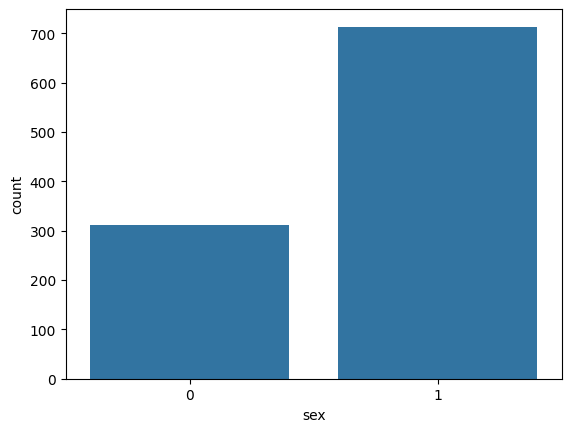

In [3]:
sns.countplot(x='sex', data=df)

<Axes: xlabel='sex', ylabel='target'>

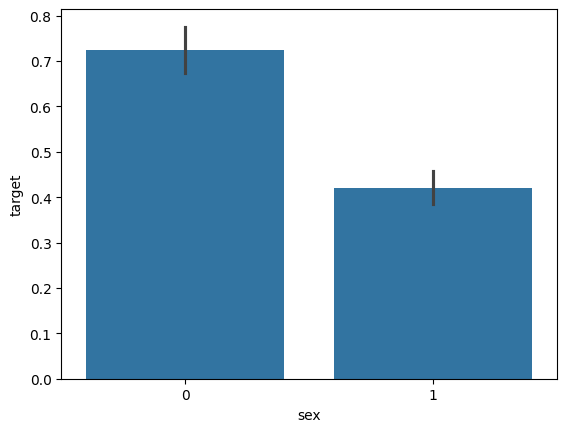

In [4]:
sns.barplot(x='sex', y="target", data=df)

Можно увидеть, что среди мужчин людей, имеющих заболевание сердца и нет примерно поровну, а среди женщин в выборке заболеваемость сильно выше. Вероятно это связано с тем, что выборка достаточно маленькая, так как здравый смысл подсказывает, что и среди женщин людей, имеющих и не имеющих заболевание, должно быть примерно поровну.

Построим кореляционную карту и проверим, какие признаки сильно коррелируют с заболеваемостью.

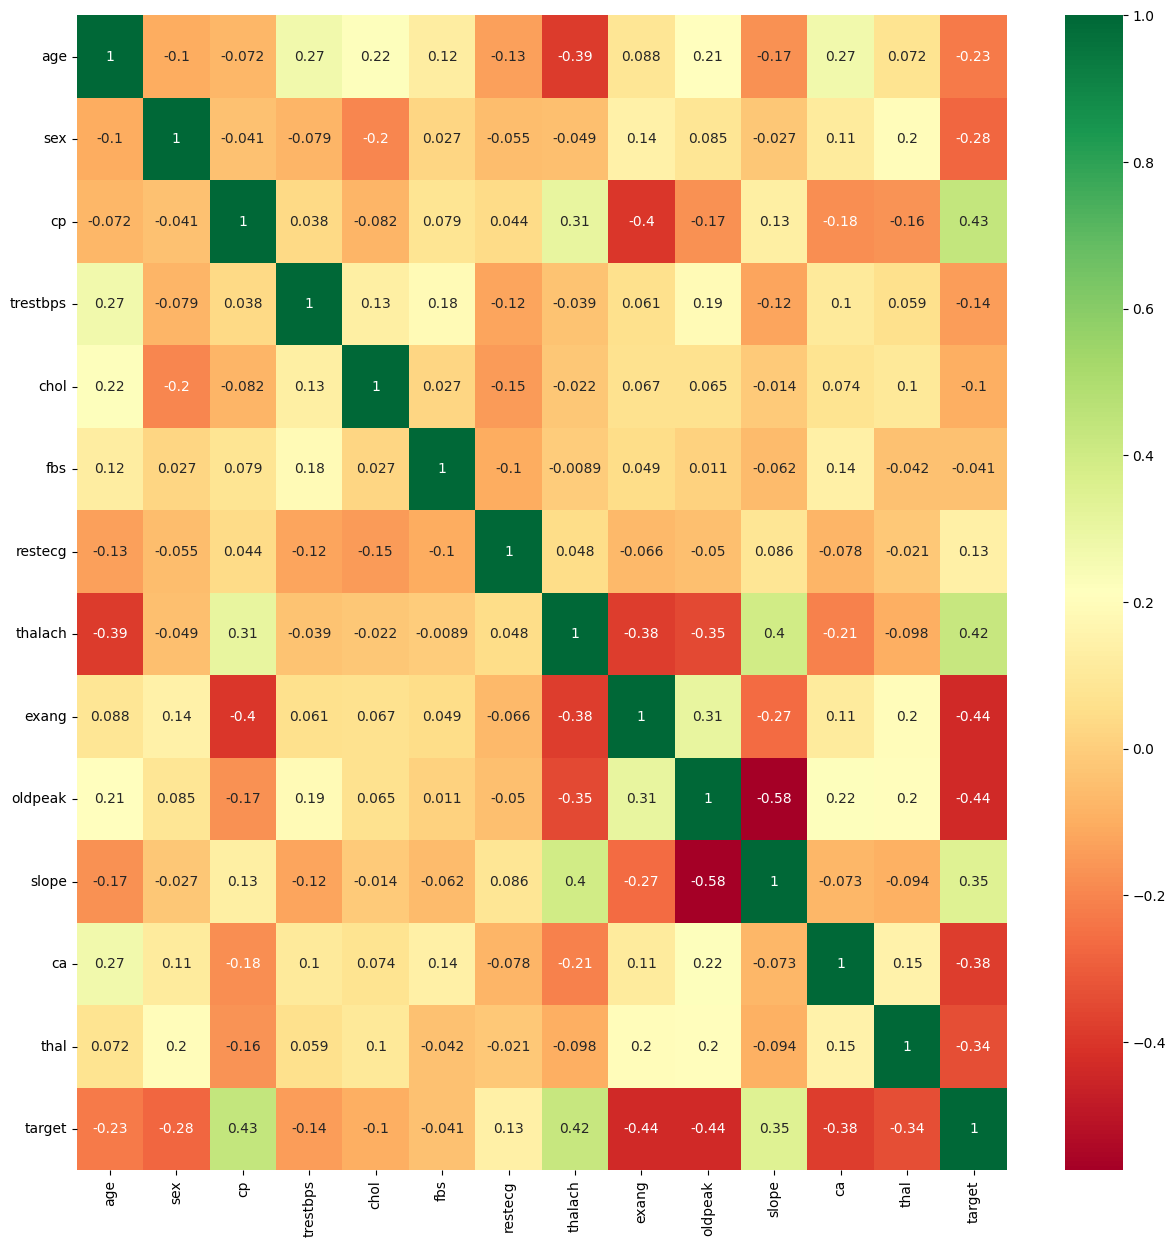

In [5]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.show()

Можно увидеть, что тип боли в груди, стенокардия и учащенное сердцебиение относительно сильно коррелируют с целевым признаком. Можно сделать вывод, что на данные симптомы стоит обращать внимание в первую очередь, если появляется подозрение на заболевание сердца. С другой стороны холестерин и уровень сахара в крови почти не коррелируют с целевым признаком, вероятно они являются малозначимыми в вопросе проблем с сердцем.

Посмотрим, как заболеваемость зависит от возраста.

<Axes: xlabel='target', ylabel='age'>

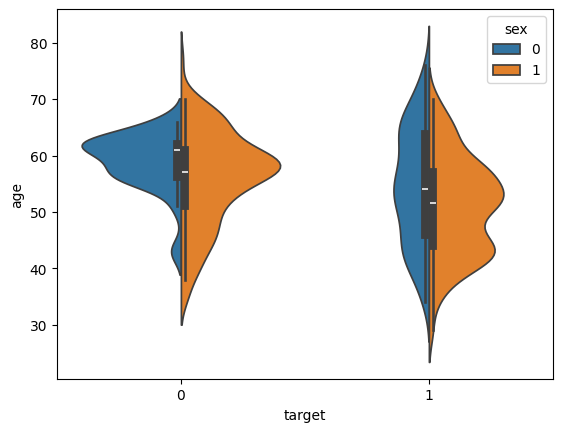

In [6]:
sns.violinplot(x="target", y="age", hue="sex", data=df, split=True)

Видно, что среди женщин, имеющих заболевание сердца, распределение очень равномерное по всем возрастным категориям, хотя в районе 50-60 лет и наблюдается наибольшее количество заболевших людей. Среди мужчин же наблюдается 2 пика заболеваемости: между 40-50 годами и между 50-60 годами. 

Также можно заметить странность нашей выборки в том, что среди не имеющих заболеваний большинство людей имеют возраст около 60 лет, что очень слабо согласуется со здравым смыслом, так как молодые люди относительно редко имеют проблемы с сердцем.

### Реализация метода классификации

Сделаем простейший KNN классификатор

In [11]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class KNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, k = 3):
        self.k = k

    def fit(self, X, y):
        self.X_, self.y_ = X, y
        return self

    def predict(self, X):
        result = np.empty((X.shape[0],), dtype=self.y_.dtype)
        
        for i, x in enumerate(X): 
            dists = np.linalg.norm(self.X_ - x, axis=1)
            sorted_dists_idx = np.argsort(dists)
            k_neighbor_classes = self.y_[sorted_dists_idx][:self.k]
            elems, counts = np.unique(k_neighbor_classes, return_counts=True)
            result[i] = elems[np.argmax(counts)]

        return result

### Обучение собственной модели без кросс валидации

Обучим собственную модель без кросс валидации и проверим качество предсказания на параметрах по умолчанию

In [14]:
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

model = KNNClassifier()
model.fit(X_train, y_train)
print("Recall train:")
print(recall_score(y_train, model.predict(X_train)))
print("Recall test:")
print(recall_score(y_test, model.predict(X_test)))

Recall train:
1.0
Recall test:
0.9333333333333333


### Подбор наилучших гиперпараметров

Используем подбор гиперпаратров в sklearn для получения наилучшего качество предсказания на нашем классификаторе

Лучшие параметры: {'k': 3}
Лучший recall: 0.9023195876288661


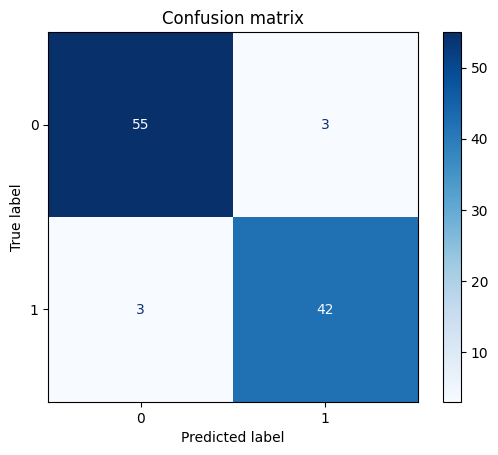

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay

def print_grid_search(grid_search):
    print("Лучшие параметры: " + str(grid_search.best_params_))
    print('Лучший recall:', grid_search.best_score_)

def train_and_print(model, param_grid, scoring):
    grid_search = GridSearchCV(
        model,
        param_grid,
        scoring=scoring
    )
    grid_search.fit(X_train, y_train)
    print_grid_search(grid_search)

    ax = ConfusionMatrixDisplay.from_estimator(
            grid_search.best_estimator_,
            X_test,
            y_test,
            cmap=plt.cm.Blues,
        ).ax_
    ax.set_title("Confusion matrix")
    ax.plot()
    
train_and_print(KNNClassifier(), {"k": [i for i in range(2, 30, 1)]}, "recall")

Можно видеть, что при выборе параметра k = 3 получаем довольно высокое качество предсказания на предложенных данных.

Посмотрим качество предсказания на классификаторах из sklearn.

Лучшие параметры: {'n_neighbors': 2}
Лучший recall: 0.8981529209621995


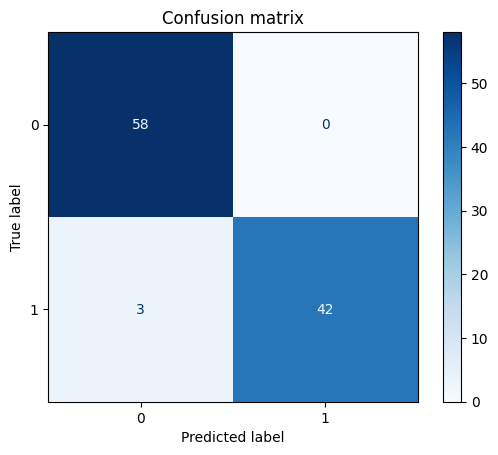

In [16]:
from sklearn.neighbors import KNeighborsClassifier

train_and_print(
    KNeighborsClassifier(),
    {
        "n_neighbors": [2, 5, 8]
    },
    "recall"
)

Лучшие параметры: {'C': 0.1, 'max_iter': 100, 'tol': 1e-06}

Лучший recall: 0.9065721649484535


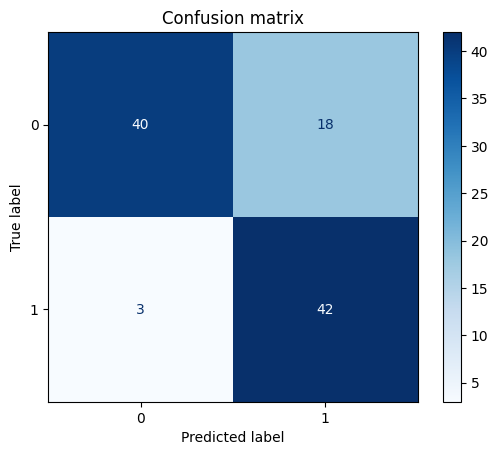

In [11]:
from sklearn.linear_model import LogisticRegression

train_and_print(
    LogisticRegression(),
    {
        "tol": [1e-6, 1e-5, 1e-4],
        "C": [0.1, 0.4, 0.7, 1],
        "max_iter": [100, 400, 700],
    },
    "recall"
)

Лучшие параметры: {'var_smoothing': 1e-05}

Лучший recall: 0.8752362542955326


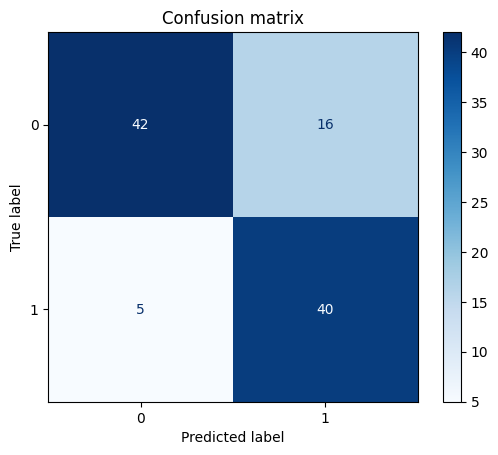

In [12]:
from sklearn.naive_bayes import GaussianNB

train_and_print(
    GaussianNB(),
    {
        "var_smoothing": [1e-3, 1e-5, 1e-7]
    },
    "recall"
)

Лучшие параметры: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'splitter': 'best'}

Лучший recall: 0.9979166666666668


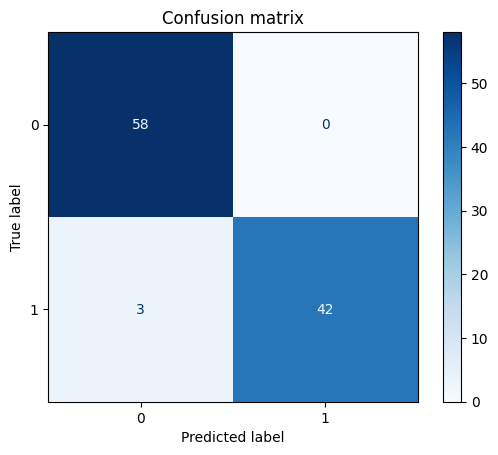

In [13]:
from sklearn.tree import DecisionTreeClassifier

train_and_print(
    DecisionTreeClassifier(),
    {
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_depth": [None, 100, 400],
        "min_samples_split": [2, 4],
        "min_samples_leaf": [1, 3],
        "min_weight_fraction_leaf": [0, 0.01, 0.1],
        "max_leaf_nodes": [None, 100, 400],
    },
    "recall"
)

Лучшие параметры: {'C': 1, 'coef0': 0, 'gamma': 'scale', 'kernel': 'linear', 'tol': 1e-06}

Лучший recall: 0.8625289014903446


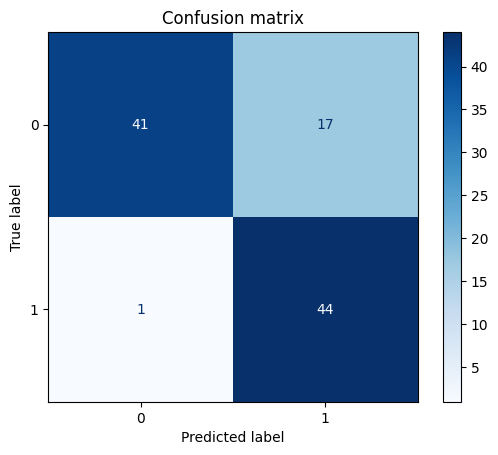

In [14]:
from sklearn.svm import SVC

train_and_print(
    SVC(),
    {
        "C": [0.01, 0.1, 1],
        "kernel": ["linear", "sigmoid"],
        "gamma": ["scale", "auto"],
        "coef0": [0, 1],
        "tol": [1e-6, 1e-4],
    },
    "f1"
)

### Вывод

На выбранном датасете можно решать задачу классификации с высокой точностью:
1. Лучше всего себя показали DecisionTreeClassifier и KNeighborsClassifier, демонстрируя нулевой false positive результат
2. Все остальные модели показали себя существенно хуже, но тем не менее судя по confusion matrix их также можно использовать для решения задачи классификации на данном датасете с довольно хорошой точностью